<a href="https://colab.research.google.com/github/Samata1695/air-pollution/blob/main/air_pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snc
import sklearn.metrics
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
air_quality = pd.read_csv("/content/700 AIR_QUALITY.csv")

In [4]:
air_quality.dropna(axis=0, how= 'all', inplace=True)
air_quality.dropna(axis=1, inplace=True)

In [5]:
air_quality.replace(to_replace= -200, value= np.NaN, inplace= True)
air_quality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [6]:
air_quality.fillna(air_quality.mean(), inplace= True)

In [7]:
air_quality.loc[:,'Date']=air_quality['Date']
air_quality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [8]:
from datetime import datetime
Date= []
for i in air_quality['Date']:
    Date.append(datetime.strptime(i,'%d-%m-%Y'))
air_quality.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [9]:
date=pd.Series(Date)
air_quality['Date']=pd.to_numeric(date)

In [10]:
air_quality['Date']=air_quality['Date'].astype(float)
air_quality.dtypes


Date             float64
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [11]:
air_quality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1.078877e+18,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,1.078877e+18,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,1.078877e+18,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,1.078877e+18,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.078877e+18,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [12]:
air_quality.loc[:,'Time']=air_quality['Time']

In [13]:
from datetime import datetime
Time= []
for i in air_quality['Time']:
    Time.append(datetime.strptime(i,'%H:%M:%S'))
air_quality.dtypes

Date             float64
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [14]:
time=pd.Series(Time)
air_quality['Time']=pd.to_numeric(time)

In [15]:
air_quality['Time']=air_quality['Time'].astype(float)
air_quality.dtypes

Date             float64
Time             float64
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [16]:
air_quality

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1.078877e+18,-2.208924e+18,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,1.078877e+18,-2.208920e+18,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,1.078877e+18,-2.208917e+18,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,1.078877e+18,-2.208913e+18,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.078877e+18,-2.208910e+18,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1.081382e+18,-2.208928e+18,3.6,1297.0,538.0,19.7,1287.0,192.0,723.0,138.0,1798.0,1216.0,21.5,24.5,0.6203
696,1.081382e+18,-2.208924e+18,4.6,1408.0,808.0,24.0,1404.0,241.0,646.0,154.0,1972.0,1463.0,19.3,28.6,0.6357
697,1.081382e+18,-2.208920e+18,6.3,1618.0,974.0,29.1,1530.0,326.0,579.0,171.0,2167.0,1791.0,18.0,32.9,0.6737
698,1.081382e+18,-2.208917e+18,4.3,1319.0,544.0,15.8,1172.0,232.0,746.0,136.0,1699.0,1425.0,15.8,39.8,0.7096


In [17]:
from sklearn.preprocessing import MinMaxScaler
num = air_quality.keys()
scaler = MinMaxScaler()
scaler.fit(air_quality[num])
air_quality[num] = scaler.transform(air_quality[num])

In [18]:
air_quality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.0,0.782609,0.294872,0.451170,0.132776,0.292746,0.454125,0.330472,0.390007,0.537143,0.394107,0.464934,0.323276,0.497804,0.513580
1,0.0,0.826087,0.217949,0.396287,0.097493,0.227979,0.383963,0.195279,0.471895,0.417143,0.312462,0.319765,0.310345,0.480234,0.466917
2,0.0,0.869565,0.243590,0.485069,0.075209,0.217617,0.371627,0.255365,0.448300,0.542857,0.310006,0.369789,0.250000,0.572474,0.502600
3,0.0,0.913043,0.243590,0.464084,0.067781,0.222798,0.378566,0.343348,0.414990,0.588571,0.327808,0.433055,0.211207,0.660322,0.555331
4,0.0,0.956522,0.166667,0.380145,0.040854,0.152850,0.292213,0.255365,0.493407,0.554286,0.270104,0.387445,0.219828,0.654466,0.558365


In [19]:

features=air_quality
features=features.drop('C6H6(GT)',axis=1)

In [20]:
target=air_quality['C6H6(GT)']

**Correlation Matrix**

In [21]:
air_quality2=air_quality.corr('pearson')
air_quality2

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,1.000000,-0.027234,-0.138847,-0.238764,0.216091,-0.108182,-0.100357,-0.176782,-0.111442,-0.183142,-0.119595,-0.238083,0.125340,-0.067991,0.122246
Time,-0.027234,1.000000,0.381230,0.396275,0.298131,0.409037,0.462727,0.305118,-0.456602,0.468967,0.359949,0.322324,0.360385,-0.371112,-0.044266
CO(GT),-0.138847,0.381230,1.000000,0.887242,0.781451,0.939516,0.915099,0.908784,-0.768200,0.813585,0.909407,0.844108,0.290344,-0.207996,0.107896
PT08.S1(CO),-0.238764,0.396275,0.887242,1.000000,0.660631,0.921112,0.929549,0.870633,-0.826674,0.815782,0.940387,0.920533,0.373676,-0.208998,0.245547
NMHC(GT),0.216091,0.298131,0.781451,0.660631,1.000000,0.785104,0.767217,0.700031,-0.698157,0.610857,0.755640,0.634769,0.326196,-0.228793,0.146801
C6H6(GT),-0.108182,0.409037,0.939516,0.921112,0.785104,1.000000,0.983048,0.892561,-0.833453,0.817054,0.955618,0.884428,0.378879,-0.301540,0.076838
PT08.S2(NMHC),-0.100357,0.462727,0.915099,0.929549,0.767217,0.983048,1.000000,0.878591,-0.902573,0.843993,0.948784,0.892178,0.416916,-0.332329,0.082909
NOx(GT),-0.176782,0.305118,0.908784,0.870633,0.700031,0.892561,0.878591,1.000000,-0.752060,0.873752,0.879101,0.854288,0.234971,-0.153112,0.104448
PT08.S3(NOx),-0.111442,-0.456602,-0.768200,-0.826674,-0.698157,-0.833453,-0.902573,-0.752060,1.000000,-0.772740,-0.855008,-0.818526,-0.430830,0.275391,-0.235596
NO2(GT),-0.183142,0.468967,0.813585,0.815782,0.610857,0.817054,0.843993,0.873752,-0.772740,1.000000,0.779980,0.811078,0.375775,-0.302507,0.064965


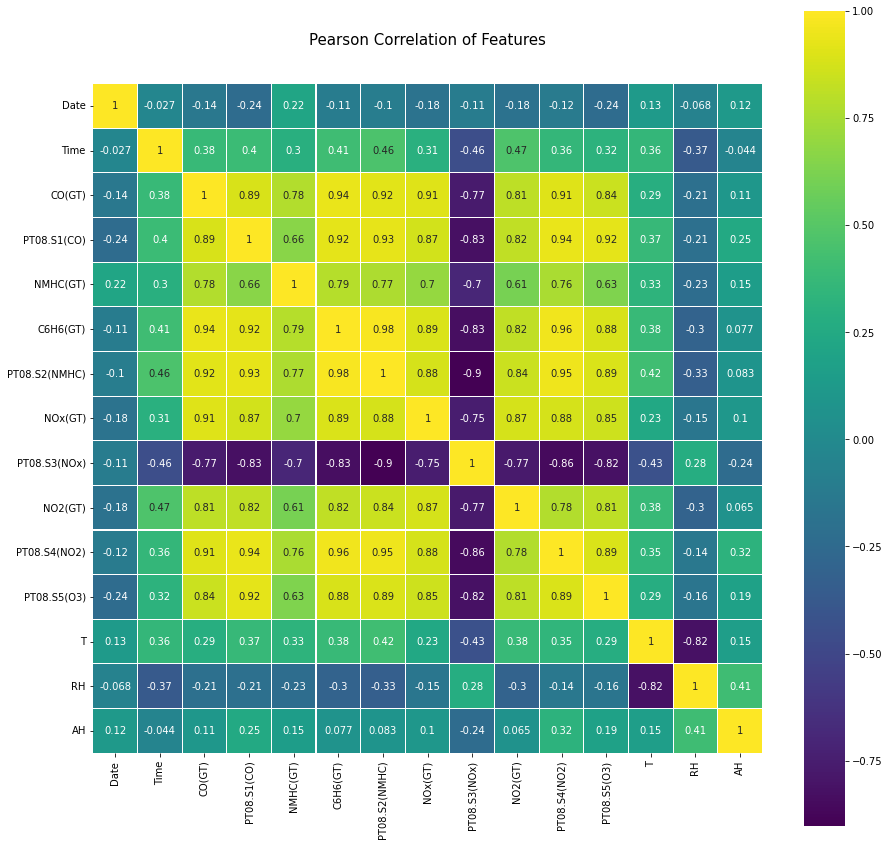

In [22]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(air_quality.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white',annot=True)

In [23]:
#sns.pairplot(air_quality)

In [24]:
abs(air_quality2['C6H6(GT)']).sort_values(ascending=False)

C6H6(GT)         1.000000
PT08.S2(NMHC)    0.983048
PT08.S4(NO2)     0.955618
CO(GT)           0.939516
PT08.S1(CO)      0.921112
NOx(GT)          0.892561
PT08.S5(O3)      0.884428
PT08.S3(NOx)     0.833453
NO2(GT)          0.817054
NMHC(GT)         0.785104
Time             0.409037
T                0.378879
RH               0.301540
Date             0.108182
AH               0.076838
Name: C6H6(GT), dtype: float64

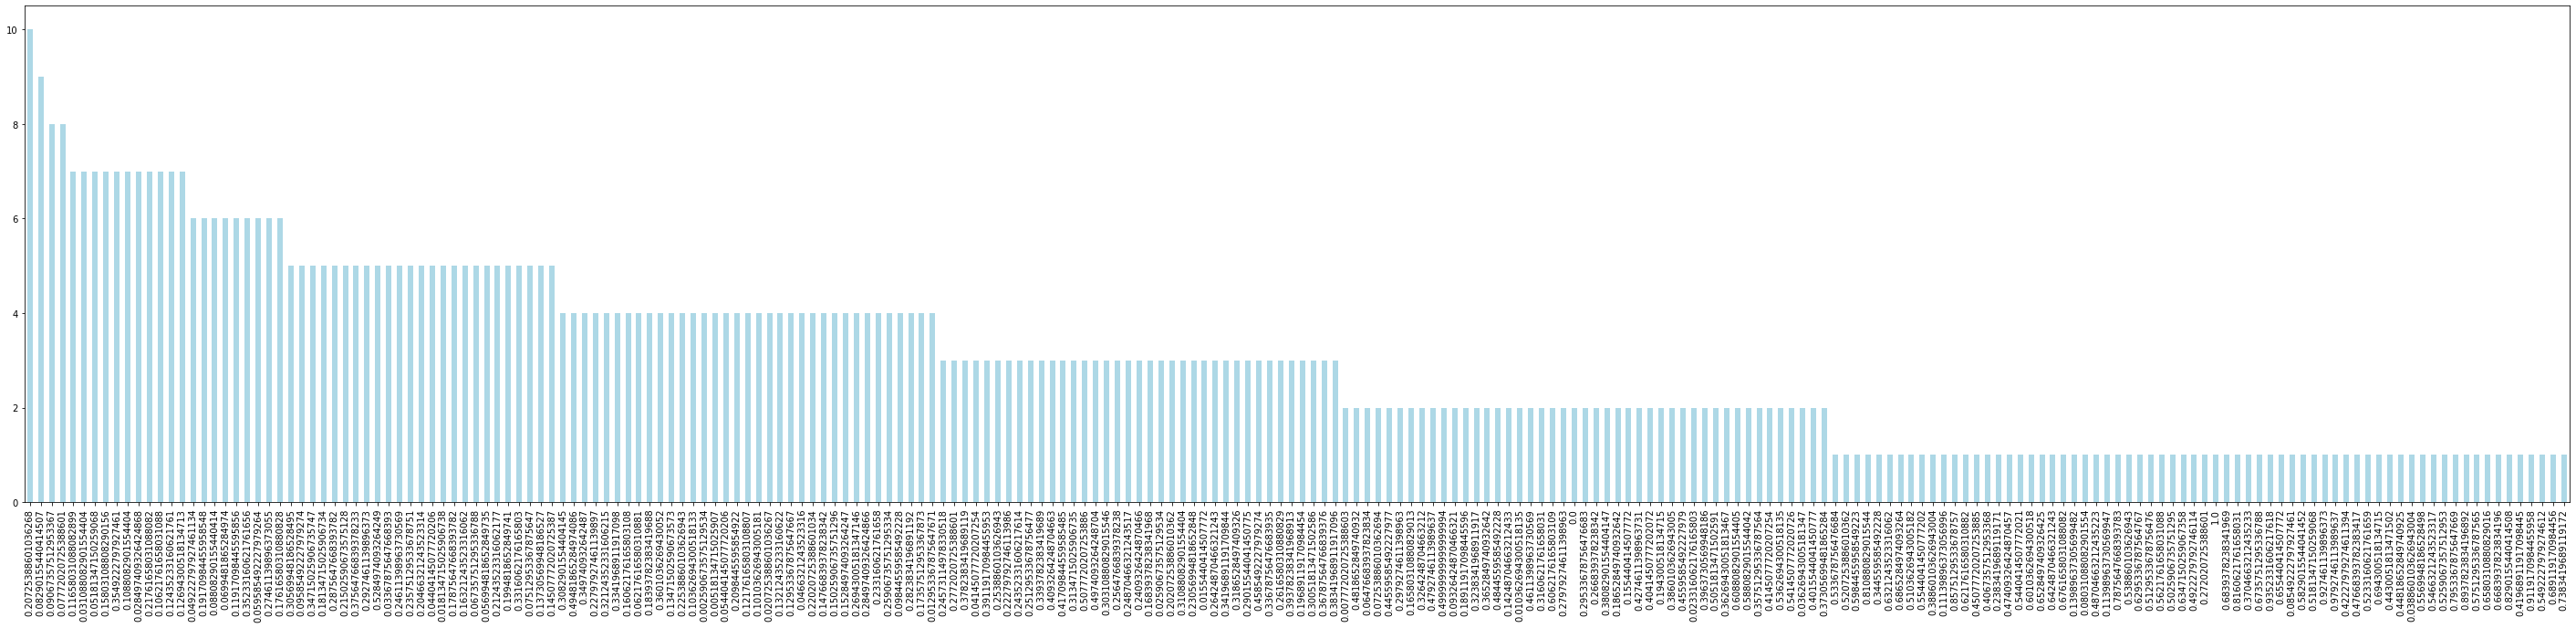

In [25]:
air_quality['C6H6(GT)'].value_counts().plot(kind='bar', color='lightblue', figsize=(50,10))

In [26]:
features=features.drop('Date',axis=1)
features=features.drop('Time',axis=1)
features=features.drop('T',axis=1)
features=features.drop('RH',axis=1)
features=features.drop('AH',axis=1)
features=features.drop('NMHC(GT)',axis=1)
features=features.drop('PT08.S2(NMHC)',axis=1)
#features=features.drop('NOx(GT)',axis=1)
#features=features.drop('PT08.S3(NOx)',axis=1)
#features=features.drop('NO2(GT)',axis=1)
#features=features.drop('PT08.S4(NO2)',axis=1)
#features=features.drop('PT08.S5(O3)',axis=1)
features.head()

,CO(GT),PT08.S1(CO),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
0,0.294872,0.451170,0.330472,0.390007,0.537143,0.394107,0.464934
1,0.217949,0.396287,0.195279,0.471895,0.417143,0.312462,0.319765
2,0.243590,0.485069,0.255365,0.448300,0.542857,0.310006,0.369789
3,0.243590,0.464084,0.343348,0.414990,0.588571,0.327808,0.433055
4,0.166667,0.380145,0.255365,0.493407,0.554286,0.270104,0.387445


In [27]:
features=features.values
target=target.values
from sklearn.model_selection import train_test_split

### **LINEAR REGRESSION**

## Experiment:1 
# Train:Test =  70:30 
---



In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)

LinearRegression(normalize=True)

In [30]:
print("Predicted values:", regressor.predict(X_test))
y_pred = regressor.predict(X_test)
y_pred.shape

Predicted values: [ 0.06996346  0.60197923  0.0262527   0.00898722  0.51111162  0.24795533
  0.15488845  0.41630199  0.16518083  0.15355368 -0.01425184  0.11871666
  0.22311092  0.22151471  0.15048214  0.55202012  0.29638035  0.12948725
  0.11593085  0.08296291  0.23456562  0.5281544   0.4362648   0.38228425
  0.27486355  0.09316265  0.20965917  0.08216545  0.05977442  0.32970607
  0.16623564  0.51713479  0.02485718 -0.07331952  0.10705966  0.4354037
  0.30774457  0.34244296  0.2284126   0.21383791  0.53598996  0.26456514
  0.35666775  0.42423366  0.38067426  0.17912263  0.52035059  0.11129398
  0.14224127  0.3912208   0.19851533  0.65629807  0.08662703  0.19344114
  0.32612312  0.37934463  0.37719481  0.27868642  0.26088218  0.15755027
  0.02976143  0.20841155  0.18060133  0.37012251  0.07914476  0.18802013
  0.22699386  0.57293887  0.11366789  0.20160851 -0.00498194  0.06498646
  0.13663748  0.26060798  0.37025994  0.1927112   0.1832553   0.12602081
  0.30824157  0.34088989  0.133832

(210,)

# *Exp:1 Evaluation metrics*

In [31]:
print("Evaluation metrics for exp 1")
print("R^2 score for liner regression: ", regressor.score(X_test, y_test))
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE:",mse)
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("MAE:",mae)
mape = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:",mape)

Evaluation metrics for exp 1
R^2 score for liner regression:  0.9378774527546958
MSE: 0.0017403310097797704
MAE: 0.02936072078031799
MAPE: 0.5298329351970774


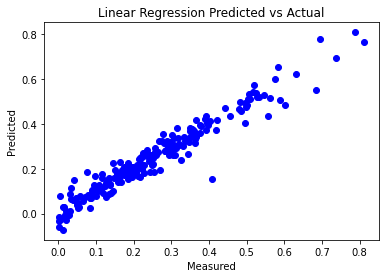

In [32]:
plt.scatter(y_test,y_pred,color='blue')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

**Experiment:2  60:40**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)
print("Predicted values:", regressor.predict(X_test))
y_pred = regressor.predict(X_test)
y_pred.shape



Predicted values: [ 0.08211012  0.2251868   0.60465279  0.78142573  0.46655853  0.46819559
  0.53205357  0.36767897  0.50791532  0.06055978  0.25502468  0.08282651
  0.48948569  0.36475757  0.4854576   0.25251382  0.20401121  0.81519269
  0.56487212  0.09828784  0.29091009  0.42588587  0.31696716  0.44941665
  0.25665725  0.5346029   0.38368555  0.22504501  0.1984831   0.34232825
  0.10074732  0.15465482  0.0077268   0.1131396   0.34405445  0.38818104
  0.37515503  0.12131291  0.29816176  0.16654506  0.39671531  0.26830645
  0.13509884  0.12260716  0.29097639  0.18843512  0.19678986  0.24971875
  0.072823    0.14837479  0.32741876  0.81310539  0.14820908  0.15991722
  0.18145216 -0.0180625   0.5602301   0.37468137  0.13396393  0.13102223
  0.51607981  0.21418592  0.15816627  0.07698148  0.20928054  0.18067251
  0.2403523   0.3170582   0.50540625  0.25788502 -0.05090182  0.13231759
  0.23960726  0.06435019  0.10924038  0.15724876  0.20308382  0.18208547
  0.29816654  0.32193022  0.32521

(280,)

In [34]:
print("Evaluation metrics for exp 2")
print("R^2 score for liner regression: ", regressor.score(X_test, y_test))
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE:",mse)
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("MAE:",mae)
mape = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:",mape)

Evaluation metrics for exp 2
R^2 score for liner regression:  0.9522039811774419
MSE: 0.001548496412960792
MAE: 0.03067384348596758
MAPE: 0.2767136732001696


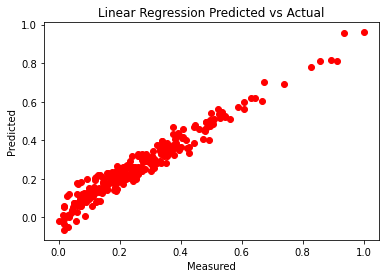

In [35]:

plt.scatter(y_test,y_pred,color='red')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

**Experiment:3 50:50**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.5)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)
print("Predicted values:", regressor.predict(X_test))
y_pred = regressor.predict(X_test)
y_pred.shape



Predicted values: [ 0.16954108  0.31739881  0.37025445  0.51587536  0.47554366  0.37013363
  0.12257579  0.12577912  0.15101263  0.20833541  0.15705775  0.01410223
  0.02400318  0.11694761  0.32379307  0.24786766  0.4613028   0.46651408
  0.23437539  0.09790449 -0.03348777  0.02676863  0.29557007  0.18632962
  0.3868858   0.30532733  0.23793271  0.18766501  0.06067469  0.33578315
  0.50461011  0.21399534  0.79622281  0.11484087  0.15242656  0.39396856
  0.60603382  0.03768497  0.16996315  0.49092246  0.28156611  0.13815984
  0.09664685  0.06849564  0.03897583  0.31805633  0.64653156  0.49014591
  0.47392246  0.233561    0.27433988  0.2271039  -0.06906102 -0.04419485
  0.22442129 -0.04100345  0.59140786  0.61487151  0.40514369  0.33599491
  0.45754217  0.07000651  0.37586476  0.37893494  0.21687748  0.31707036
  0.1069482   0.41576531  0.09718968  0.15394619  0.19273337  0.46747848
  0.30537876  0.38224624  0.25586902  0.27234781  0.07821113  0.21451915
  0.37746062  0.39269848  0.61826

(350,)

In [37]:
print("Evaluation metrics for exp 3")
print("R^2 score for liner regression: ", regressor.score(X_test, y_test))

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE:",mse)
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("MAE:",mae)
mape = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:",mape)

Evaluation metrics for exp 3
R^2 score for liner regression:  0.9389317461187343
MSE: 0.002076704543570075
MAE: 0.03357184401771201
MAPE: 568674035435.6997


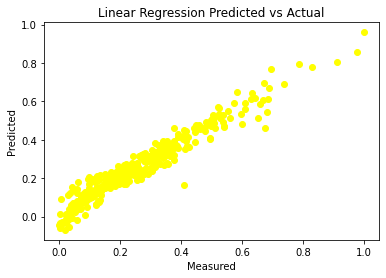

In [38]:

plt.scatter(y_test,y_pred,color='yellow')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

**Experiment:4   40:60**

In [39]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.6)
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from sklearn.metrics import precision_score, recall_score,f1_score, accuracy_score
regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)
print("Predicted values:", regressor.predict(X_test))
y_pred = regressor.predict(X_test)
y_pre=y_pred.round




Predicted values: [ 8.31810353e-02  3.67852308e-01  4.89893554e-01  2.01851472e-01
  3.01526900e-01  3.86197188e-01  1.99679188e-01  2.07974830e-01
  2.72021449e-01  3.43267298e-01  5.61801486e-01  2.17005624e-01
  3.46568794e-01  2.92283707e-01  7.86542538e-02  8.17518481e-02
  5.28135991e-02  4.03695525e-02  2.30382060e-01  3.05094395e-02
  2.81784237e-01  3.06909134e-01  5.04844202e-01  7.58615608e-02
  5.63981348e-01  3.32758978e-01  2.22447405e-01  7.55799754e-02
  2.07738275e-01  2.92332960e-01  1.14861966e-01  2.39556804e-01
 -3.36412000e-02  2.48228083e-01  6.37340283e-02  1.36960584e-01
  1.60937144e-01  2.34408494e-01  1.78062372e-02  3.43025388e-01
 -2.24710490e-02  1.88769004e-01  1.57298904e-02  1.47610616e-01
  7.73577793e-01  4.88333712e-02  1.04929892e-01  2.11177062e-01
  3.07558543e-01  1.58259720e-01  8.38136182e-03  4.27835651e-01
  2.18492107e-01  1.89352694e-01  3.20474495e-01  4.60065282e-01
  6.37877916e-01  8.80272914e-02  2.18534592e-01  2.96732011e-01
  5.108

In [40]:
print("Evaluation metrics for exp 4")
print("R^2 score for liner regression: ", regressor.score(X_test, y_test))

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE:",mse)
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("MAE:",mae)
mape = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:",mape)

Evaluation metrics for exp 4
R^2 score for liner regression:  0.9465128215978589
MSE: 0.0018264518314212777
MAE: 0.032209627540786115
MAPE: 0.5175602111729913


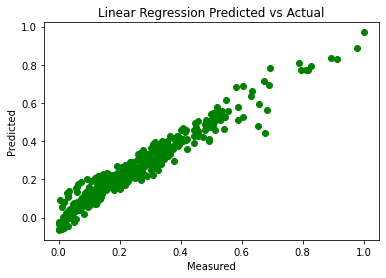

In [41]:
plt.scatter(y_test,y_pred,color='green')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

### **LASSO REGRESSION**
# **Exp:1**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (490, 7)
Test data size: (210, 7)


In [43]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [44]:
print("Predicted values:", lasso.predict(X_test))
y_pred = lasso.predict(X_test)

Predicted values: [0.25295392 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392
 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392
 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392
 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392
 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392
 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392
 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392
 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392
 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392
 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392
 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392
 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392
 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392
 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392 0.25295392
 0.25295392 0.25295392 0.25295392 0.25295392

In [45]:
print("Evaluation metrics for exp 1")
print("R^2 score for lasso regression: ", regressor.score(X_test, y_test))

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE:",mse)
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("MAE:",mae)
mape = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:",mape)

Evaluation metrics for exp 1
R^2 score for lasso regression:  0.9342862813150911
MSE: 0.027272077936362875
MAE: 0.1356244668978422
MAPE: 5424777049061.975


Text(0.5, 1.0, 'Lasso Regression Predicted vs Actual')

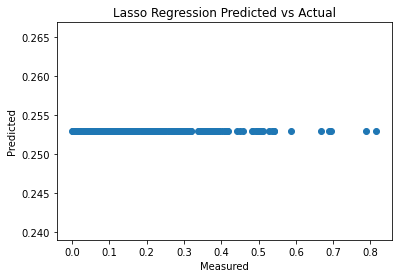

In [46]:
plt.scatter(y_test,y_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Regression Predicted vs Actual')

# **Exp:2**

In [47]:

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4)

print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (420, 7)
Test data size: (280, 7)


In [48]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [49]:
print("Predicted values:", lasso.predict(X_test))
y_pred = lasso.predict(X_test)

Predicted values: [0.24140669 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669
 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669
 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669
 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669
 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669
 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669
 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669
 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669
 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669
 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669
 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669
 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669
 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669
 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669 0.24140669
 0.24140669 0.24140669 0.24140669 0.24140669

In [50]:
print("Evaluation metrics for exp 2")
print("R^2 score for lasso regression: ", regressor.score(X_test, y_test))

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE:",mse)
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("MAE:",mae)
mape = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:",mape)

Evaluation metrics for exp 2
R^2 score for lasso regression:  0.9486284899660308
MSE: 0.03695305026946997
MAE: 0.15198428910297848
MAPE: 3882853818418.664


Text(0.5, 1.0, 'Lasso Regression Predicted vs Actual')

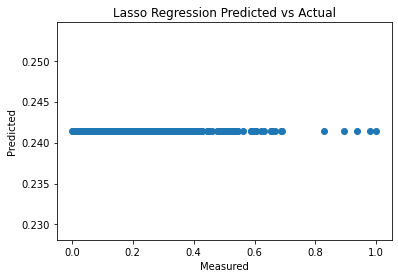

In [51]:
plt.scatter(y_test,y_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Regression Predicted vs Actual')

Exp:3

In [52]:

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.5)

print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (350, 7)
Test data size: (350, 7)


In [53]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [54]:
print("Predicted values:", lasso.predict(X_test))
y_pred = lasso.predict(X_test)

Predicted values: [0.24268471 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471
 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471
 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471
 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471
 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471
 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471
 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471
 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471
 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471
 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471
 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471
 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471
 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471
 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471 0.24268471
 0.24268471 0.24268471 0.24268471 0.24268471

In [55]:
print("Evaluation metrics for exp 3")
print("R^2 score for lasso regression: ", regressor.score(X_test, y_test))

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE:",mse)
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("MAE:",mae)
mape = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:",mape)

Evaluation metrics for exp 3
R^2 score for lasso regression:  0.9482971348953978
MSE: 0.03284364222251033
MAE: 0.13927086434725539
MAPE: 2.235638850352123


Text(0.5, 1.0, 'Lasso Regression Predicted vs Actual')

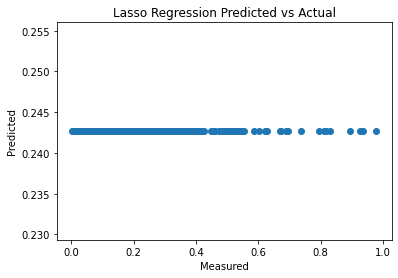

In [56]:
plt.scatter(y_test,y_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Regression Predicted vs Actual')

Exp:4

In [57]:

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.6)

print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (280, 7)
Test data size: (420, 7)


In [58]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [59]:
print("Predicted values:", lasso.predict(X_test))
y_pred = lasso.predict(X_test)

Predicted values: [0.24950826 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826
 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826
 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826
 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826
 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826
 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826
 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826
 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826
 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826
 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826
 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826
 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826
 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826
 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826 0.24950826
 0.24950826 0.24950826 0.24950826 0.24950826

In [60]:
print("Evaluation metrics for exp 4")
print("R^2 score for lasso regression: ", regressor.score(X_test, y_test))

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE:",mse)
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("MAE:",mae)
mape = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:",mape)

Evaluation metrics for exp 4
R^2 score for lasso regression:  0.950789417753899
MSE: 0.03234850920750306
MAE: 0.14171755091522265
MAPE: 5350882310571.827


Text(0.5, 1.0, 'Lasso Regression Predicted vs Actual')

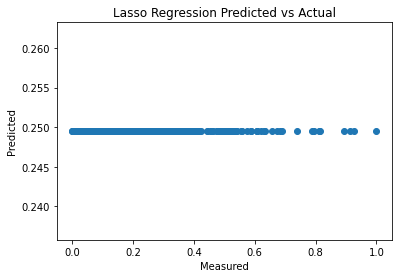

In [61]:
plt.scatter(y_test,y_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Regression Predicted vs Actual')

### **RIDGE REGRESSION**
# Exp:1

In [62]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (490, 7)
Test data size: (210, 7)


In [63]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge.fit(X_train, y_train)

Ridge()

In [64]:
print("Predicted values:", Ridge.predict(X_test))
y_pred = Ridge.predict(X_test)

Predicted values: [ 0.37729957  0.04880179  0.31854553  0.14545407  0.18200695  0.43140927
  0.34633804  0.20771351  0.01945097  0.19541065  0.21060424  0.38473313
  0.41348709  0.08201307  0.50282026  0.03219876  0.04862591  0.20103654
 -0.00941575  0.48524429  0.53788356  0.21725501  0.04462128  0.49456867
  0.20487483  0.03563367  0.45832063  0.19316907  0.06985798  0.30220994
  0.17601144  0.20771023  0.15931927  0.06260645  0.18514745  0.32546788
  0.09397433  0.5288652   0.07302227  0.4062302   0.35231977 -0.00487623
  0.31875786  0.33063872  0.0359445   0.72873074  0.07718037  0.03100131
  0.27122194  0.10802805  0.15061765  0.09763891  0.28223555  0.08366773
  0.36146593  0.04247723  0.15454975  0.54229533  0.12757497  0.17602463
  0.39393838  0.00129669  0.37129122  0.02977684  0.11392605  0.4751743
  0.32946199  0.59624145  0.2507022   0.32707164  0.19931587  0.21263858
  0.01924401  0.24210608  0.07243007 -0.01292612  0.39551659  0.32204056
  0.12019537  0.04661269 -0.075626

In [65]:
print("Evaluation metrics for exp 1")
print("R^2 score for Ridge regression: ", Ridge.score(X_test, y_test))

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE:",mse)
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("MAE:",mae)
mape = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:",mape)

Evaluation metrics for exp 1
R^2 score for Ridge regression:  0.944723460607544
MSE: 0.001967859902833817
MAE: 0.034190810150785546
MAPE: 1621853486426.3494


Text(0.5, 1.0, 'Ridge Regression Predicted vs Actual')

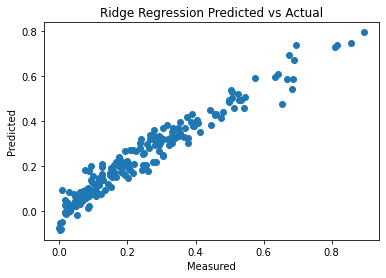

In [66]:
plt.scatter(y_test,y_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Ridge Regression Predicted vs Actual')

# Exp:2

In [67]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4)

print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (420, 7)
Test data size: (280, 7)


In [68]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge.fit(X_train, y_train)

Ridge()

In [69]:
print("Predicted values:", Ridge.predict(X_test))
y_pred = Ridge.predict(X_test)

Predicted values: [ 0.04921141  0.21143743  0.19171914  0.27289473  0.65555544  0.43807174
  0.2405622   0.07392923  0.05514299  0.31829108  0.10260638  0.0963838
  0.74402961  0.35829193  0.10293138  0.17356147  0.37184161  0.10634995
  0.58829191  0.54504491  0.2587904   0.10494428  0.36150284  0.21040702
  0.10879767  0.3187839   0.1856583   0.39508919  0.45429209  0.23917895
  0.03360848  0.79041001  0.21674354  0.48489244  0.19745729  0.32169813
  0.45422451  0.20503545 -0.00152547  0.43248717  0.48104237  0.23688625
  0.14508207  0.18524087  0.48538449  0.30553243  0.12466531  0.08471875
  0.28295082  0.27880593 -0.06906733  0.31994115  0.3594829   0.03761275
  0.02150237  0.56789541  0.31170781  0.47108188  0.1805926   0.41135378
  0.22505043  0.19172796  0.34738118  0.11247189  0.83284748  0.17798817
  0.01795115  0.24576758  0.53460997  0.12620718  0.32305962  0.02415147
  0.3660523   0.34969289  0.45516173 -0.00474883  0.657557    0.21296878
  0.07092613  0.02571602  0.693656

In [70]:
print("Evaluation metrics for exp 2")
print("R^2 score for Ridge regression: ", Ridge.score(X_test, y_test))

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE:",mse)
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("MAE:",mae)
mape = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:",mape)

Evaluation metrics for exp 2
R^2 score for Ridge regression:  0.9406884103447521
MSE: 0.002077058242990715
MAE: 0.03560734053161215
MAPE: 0.42471803838499617


Text(0.5, 1.0, 'Ridge Regression Predicted vs Actual')

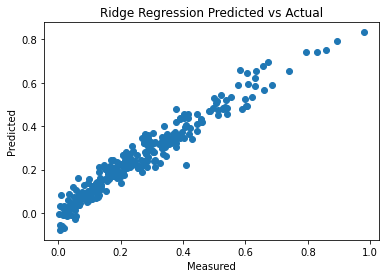

In [71]:
plt.scatter(y_test,y_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Ridge Regression Predicted vs Actual')

Exp:3

In [72]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.5)

print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (350, 7)
Test data size: (350, 7)


In [73]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge.fit(X_train, y_train)

Ridge()

In [74]:
print("Predicted values:", Ridge.predict(X_test))
y_pred = Ridge.predict(X_test)

Predicted values: [ 0.09237433  0.33889467  0.28888428  0.50268173  0.27570579  0.73645283
  0.20990295  0.14642306  0.36640721  0.24668046  0.17401161 -0.04124411
  0.10375909  0.26816768  0.18839803  0.14682967  0.07671179  0.19786037
  0.3270591   0.12647991  0.34741941  0.48466329  0.05926381 -0.06619371
  0.53494497  0.73202221  0.30220928  0.18027635 -0.03239183  0.35478427
  0.16646751  0.24408915  0.20750169  0.0349016   0.02343981  0.21641295
 -0.00465951  0.14635419  0.26417734  0.15898095  0.78760012  0.22512304
  0.19328108  0.17741969 -0.00615101  0.32380072  0.32990125  0.26904113
  0.0937044   0.3356692  -0.02934996  0.22173495  0.16863515  0.48928413
  0.23134549  0.17446599  0.0682495   0.18852323  0.90982541  0.22205485
  0.64745859  0.13280255  0.11444648  0.19793667  0.35623854  0.19548093
  0.13016674  0.14091905  0.30406347  0.5201598   0.62016447  0.22495697
  0.27917553  0.23706178  0.1294186   0.06979171  0.04167306  0.25716015
  0.4980257   0.32772018  0.21698

In [75]:
print("Evaluation metrics for exp 3")
print("R^2 score for Ridge regression: ", Ridge.score(X_test, y_test))

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE:",mse)
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("MAE:",mae)
mape = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:",mape)

Evaluation metrics for exp 3
R^2 score for Ridge regression:  0.943388600962104
MSE: 0.0019726131689720107
MAE: 0.03356931362686631
MAPE: 1708159874798.115


Text(0.5, 1.0, 'Ridge Regression Predicted vs Actual')

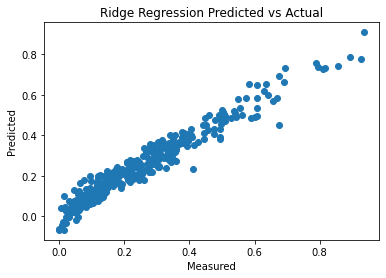

In [76]:
plt.scatter(y_test,y_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Ridge Regression Predicted vs Actual')

# Exp:4

In [77]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.6)

print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (280, 7)
Test data size: (420, 7)


In [78]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge.fit(X_train, y_train)

Ridge()

In [79]:
print("Predicted values:", Ridge.predict(X_test))
y_pred = Ridge.predict(X_test)

Predicted values: [ 8.53420450e-02  3.83433056e-01  1.00943025e-01  1.84903727e-01
 -8.43828455e-02  2.59632685e-01  1.24551406e-01  4.11149733e-01
  2.42000246e-01  8.31783681e-03  4.88081205e-02  3.46334585e-01
  6.63071514e-02  2.08976312e-01  1.09061585e-01  2.87487403e-02
  1.57496374e-01  1.85506340e-01  2.43850125e-01  1.22794178e-01
  2.15655529e-01  3.64424368e-01 -6.82816567e-02  3.32338054e-01
  1.09832084e-01  1.21004989e-01  9.48983716e-02  2.10997420e-01
  1.01735859e-01  4.28807699e-01  2.67128066e-01  8.43839682e-02
  1.12986194e-01  1.60738215e-01  2.81059578e-01  2.02643606e-01
  5.90359960e-04  4.61972175e-01  4.81086553e-01  3.34470475e-01
  3.99133244e-01  3.22719795e-01 -2.42321666e-02  3.96663986e-01
  6.48361926e-01  1.07548506e-01  1.55696463e-01  3.56093907e-01
  2.15741107e-01  3.07860463e-01  2.52107773e-01  7.64244762e-01
  1.13112810e-01  2.12241352e-01  2.32486641e-01  1.69880496e-01
  4.66198306e-01  2.43531081e-01  5.31103754e-01  1.39241587e-01
  3.331

In [80]:
print("Evaluation metrics for exp 4")
print("R^2 score for Ridge regression: ", Ridge.score(X_test, y_test))

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE:",mse)
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("MAE:",mae)
mape = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:",mape)

Evaluation metrics for exp 4
R^2 score for Ridge regression:  0.9349985950030046
MSE: 0.002322200927412684
MAE: 0.03574302509703117
MAPE: 920695966795.3019


Text(0.5, 1.0, 'Ridge Regression Predicted vs Actual')

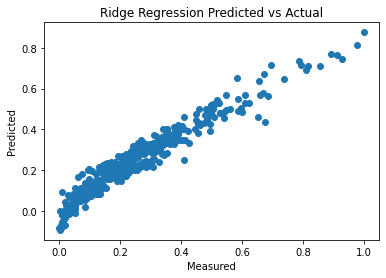

In [81]:
plt.scatter(y_test,y_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Ridge Regression Predicted vs Actual')